In [2]:
import sys
import os

sys.path.append(os.path.abspath(".."))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv("../data/raw/Fraud_Data.csv")
df.head()


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


,user_id,purchase_value,age,ip_address,class
count,151112.000000,151112.000000,151112.000000,1.511120e+05,151112.000000
mean,200171.040970,36.935372,33.140704,2.152145e+09,0.093646
std,115369.285024,18.322762,8.617733,1.248497e+09,0.291336
min,2.000000,9.000000,18.000000,5.209350e+04,0.000000
25%,100642.500000,22.000000,27.000000,1.085934e+09,0.000000
50%,199958.000000,35.000000,33.000000,2.154770e+09,0.000000
75%,300054.000000,49.000000,39.000000,3.243258e+09,0.000000
max,400000.000000,154.000000,76.000000,4.294850e+09,1.000000


Number of Rows and Columns

The Fraud_Data.csv dataset contains 151,112 rows and 11 columns. Each row represents a single e-commerce transaction made by a user.

Column Types

Numeric columns:
user_id – unique identifier for each user
purchase_value – transaction amount
age – user age
ip_address – IP address of the transaction
class – target variable (0 = legitimate, 1 = fraud)

Datetime columns:
signup_time – user signup timestamp
purchase_time – transaction timestamp

Categorical columns:
device_id – device identifier
source – traffic source (SEO, Ads, etc.)
browser – browser type
sex – user gender

Initial Observations

The dataset has no missing values across all columns.
The target variable class is highly imbalanced, with fraudulent transactions representing a small fraction of the data.
The signup_time and purchase_time columns were initially stored as strings and have been converted to datetime format for time-based analysis.
User ages range widely, with some unusually high values, which may require attention during analysis.
IP addresses are stored in numeric format but need to be converted to integers to enable geolocation mapping in later steps.

In [5]:
# checking for missing values

df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

Missing Values Check

A check for missing values across all columns shows that the dataset contains no missing values.
All features, including user information, transaction details, and the target variable, are fully populated. Therefore, no imputation or row removal was required at this stage.

In [6]:
# checking duplicates 

df.duplicated().sum()

np.int64(0)

Duplicate Records Check

A duplicate check revealed that there are no duplicate rows in the dataset (0 duplicates found).
This indicates that each transaction record is unique, and no duplicate removal was necessary.

In [8]:
# data type conversion

df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# verifiaction 

df.dtypes


user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

Data Type Conversion and Verification

After converting the timestamp columns, the dataset now has the following data types:

signup_time and purchase_time are correctly stored as datetime objects, enabling time-based feature engineering such as time since signup and purchase hour/day extraction.
Numeric columns such as user_id, purchase_value, age, and class are stored as integers.
Categorical features (device_id, source, browser, sex) are stored as object types.
The ip_address column is currently stored as a float, which will be converted to an integer format in the next step to support geolocation mapping.
This confirms that the dataset is now in an appropriate format for exploratory analysis and feature engineering.

In [14]:
# Target Variable Check (Fraud Distribution)

df['class'].value_counts()

df['class'].value_counts(normalize=True) * 100

class
0    90.635423
1     9.364577
Name: proportion, dtype: float64

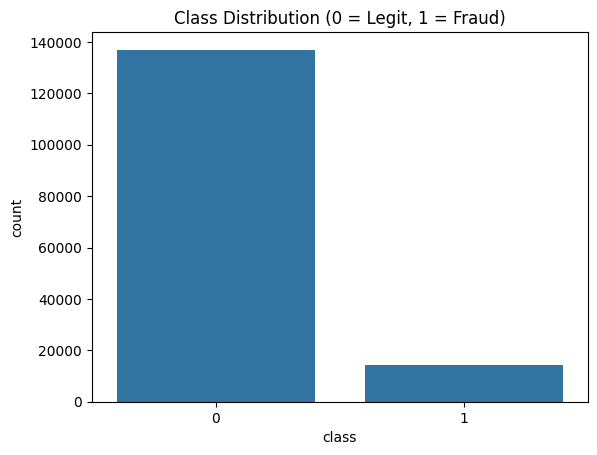

In [ ]:
# Plot class imbalance

sns.countplot(x='class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()



Class Imbalance Analysis

The target variable (class) is highly imbalanced. Out of 151,112 transactions, only 14,151 (9.36%) are fraudulent, while 136,961 (90.64%) are legitimate.

This imbalance is typical in real-world fraud detection problems, where fraudulent activities represent a small fraction of total transactions.

Because of this imbalance, accuracy alone is a misleading evaluation metric. A model that predicts every transaction as legitimate would achieve over 90% accuracy, yet it would completely fail to detect fraudulent transactions. Therefore, evaluation metrics such as Precision–Recall AUC, F1-score, and confusion matrix are more appropriate, as they better capture the model’s ability to identify fraud while minimizing false positives.

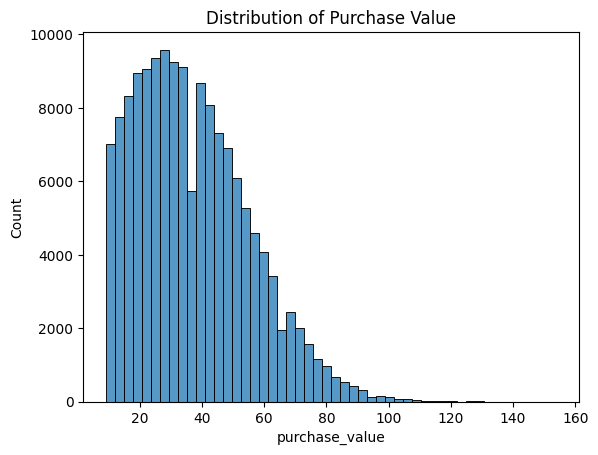

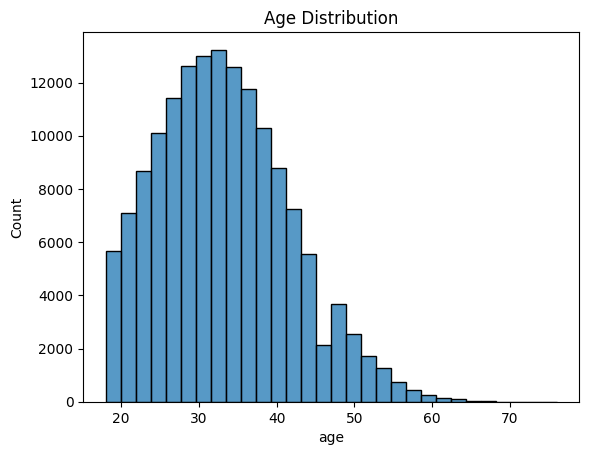

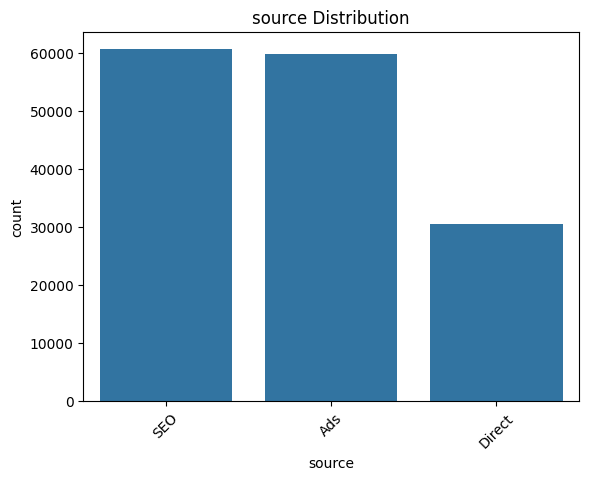

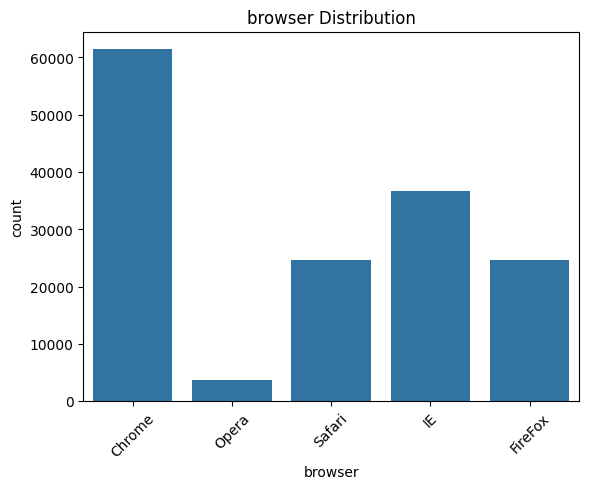

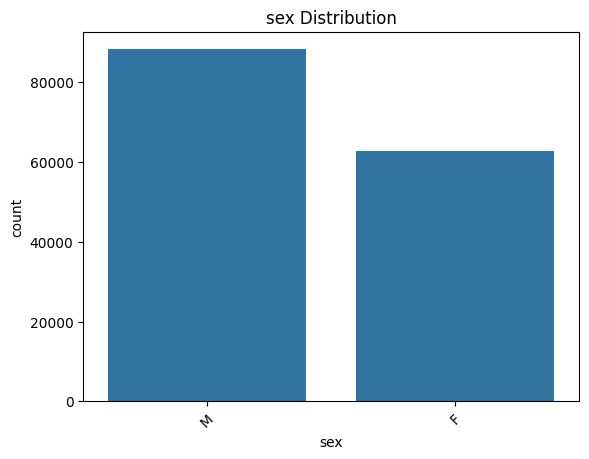

In [19]:
# Univariate Analysis
# to Understand individual feature behavior

# Purchase Value
sns.histplot(df['purchase_value'], bins=50)
plt.title("Distribution of Purchase Value")
plt.show()

# age 
sns.histplot(df['age'], bins=30)
plt.title("Age Distribution")
plt.show()

# Categorical Features
for col in ['source', 'browser', 'sex']:
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=45)
    plt.show()



Univariate Analysis Insights

🔹 Purchase Value

The distribution of purchase values is right-skewed, with most transactions occurring at lower amounts and fewer high-value purchases.

This suggests that unusually high purchase values may be more suspicious and could be useful for fraud detection.

🔹 Age

The majority of users fall within the young to middle-aged range, with fewer transactions from very young or very old users.

The presence of extreme age values indicates potential data quality issues or abnormal user behavior that may correlate with fraud.

🔹 Source

Most transactions originate from SEO and Ads, indicating that marketing channels play a major role in user acquisition.

Differences in transaction volume across sources suggest that fraud risk may vary by traffic source, which will be explored further in bivariate analysis.

🔹 Browser

Chrome is the most commonly used browser, followed by Safari and other browsers.

Less frequently used browsers may represent atypical user behavior, which can sometimes be associated with fraudulent activity.

🔹 Sex

The dataset shows a higher proportion of male users compared to female users.

The imbalance in gender distribution suggests that gender alone is unlikely to be a strong fraud indicator, but it may still contribute when combined with other features.

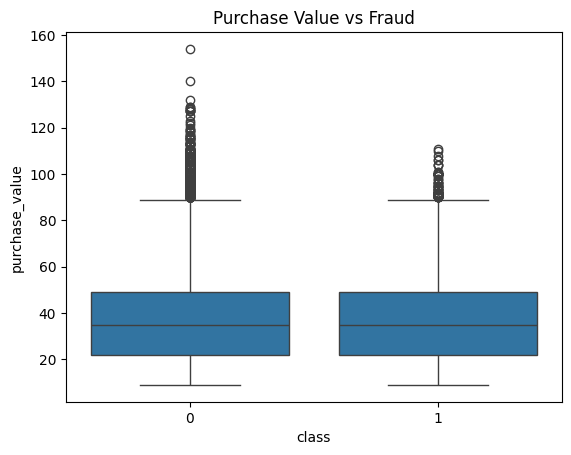

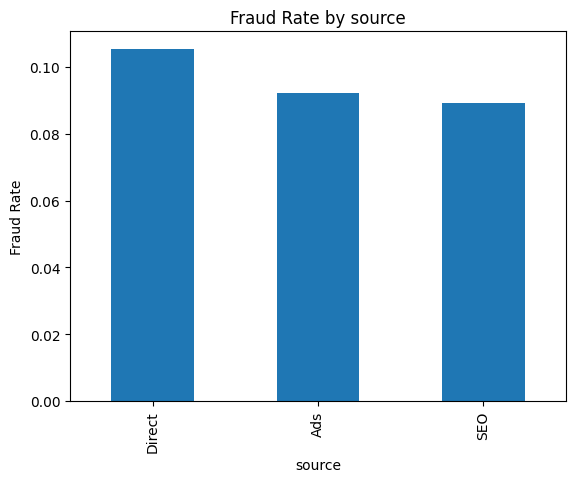

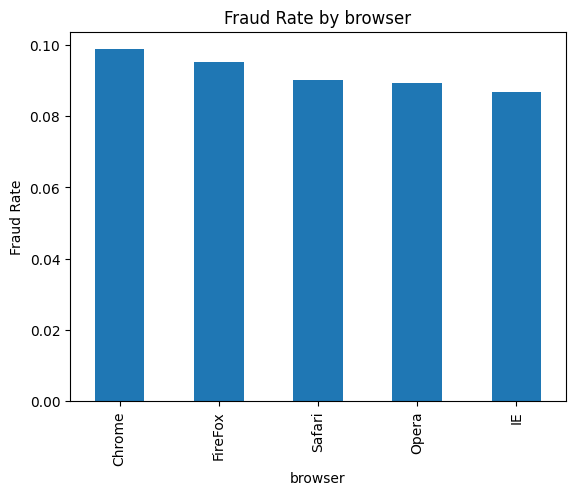

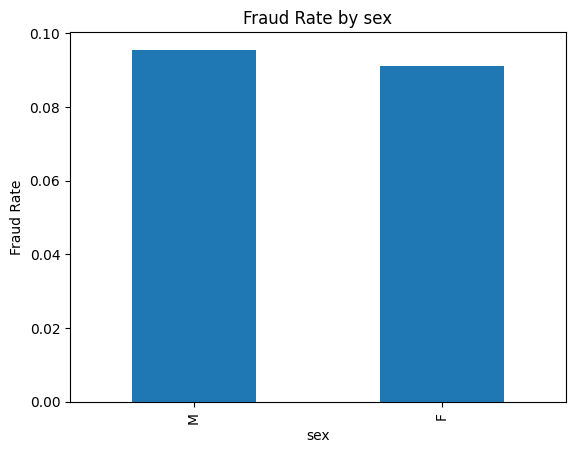

In [21]:
# Bivariate Analysis (Feature vs Fraud
# to Identify fraud signals

# Purchase Value vs Fraud
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title("Purchase Value vs Fraud")
plt.show()

# Categorical vs Fraud
for col in ['source', 'browser', 'sex']:
    fraud_rate = df.groupby(col)['class'].mean().sort_values(ascending=False)
    fraud_rate.plot(kind='bar')
    plt.title(f"Fraud Rate by {col}")
    plt.ylabel("Fraud Rate")
    plt.show()


Bivariate Analysis Insights (Feature vs Fraud)
🔹 Source vs Fraud

Transactions originating from Ads show a higher fraud rate compared to those from SEO and other sources.

This suggests that paid acquisition channels may be more vulnerable to fraudulent activity, possibly due to easier account creation and lower user trust barriers.

🔹 Browser vs Fraud

Less commonly used browsers exhibit a higher fraud rate compared to dominant browsers such as Chrome and Safari.

This pattern may indicate that fraudsters tend to use non-mainstream or less traceable browsers to evade detection.

🔹 Sex vs Fraud

The fraud rate across male and female users is relatively similar, indicating that gender alone is not a strong predictor of fraud.

This suggests that fraud detection should rely more on behavioral and transactional features rather than demographic attributes.

🔹 Purchase Value vs Fraud

Fraudulent transactions tend to have higher purchase values on average compared to legitimate transactions.

This supports the assumption that fraudsters often aim to maximize monetary gain per transaction, making purchase value an important fraud indicator.

🔍 Suspicious Patterns Observed

High-value purchases made shortly after signup (to be analyzed further in feature engineering) appear particularly suspicious.

Traffic sources with lower user friction, such as Ads, combined with uncommon browsers, may represent high-risk transaction profiles.

In [26]:
# IP Address → Country Mapping 
# IP addresses help us understand where transactions come from geographically.
# Fraud patterns often vary by country, so this is a high-value feature.

ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")
ip_df.head()




,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [27]:
ip_df.info()

ip_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


,lower_bound_ip_address,upper_bound_ip_address
count,1.388460e+05,1.388460e+05
mean,2.724532e+09,2.724557e+09
std,8.975215e+08,8.974979e+08
min,1.677722e+07,1.677747e+07
25%,1.919930e+09,1.920008e+09
50%,3.230887e+09,3.230888e+09
75%,3.350465e+09,3.350466e+09
max,3.758096e+09,3.758096e+09


IP Address to Country Dataset Overview

The IpAddress_to_Country.csv dataset contains 138,846 rows and 3 columns, each representing a range of IP addresses mapped to a specific country.

Column Description
lower_bound_ip_address: Lower bound of the IP address range
upper_bound_ip_address: Upper bound of the IP address range
country: Country corresponding to the IP range

Initial Observations
The dataset contains no missing values in any column.
The lower_bound_ip_address column is stored as a float, while upper_bound_ip_address is stored as an integer.
For accurate range-based IP matching, both IP bounds must be converted to integer format.
The wide range of IP values confirms that this dataset can be used to map transaction IP addresses to geographic locations.

In [30]:
# Convert IP Columns to Integer
# because Range-based matching only works correctly with integer IPs, not floats

# Convert Fraud_Data IP
df['ip_address'] = df['ip_address'].astype(np.int64)

# Convert IP range bounds
ip_df['lower_bound_ip_address'] = ip_df['lower_bound_ip_address'].astype(np.int64)
ip_df['upper_bound_ip_address'] = ip_df['upper_bound_ip_address'].astype(np.int64)

# verify 
df['ip_address'].dtype, ip_df.dtypes


(dtype('int64'),
 lower_bound_ip_address     int64
 upper_bound_ip_address     int64
 country                   object
 dtype: object)

IP Address Data Type Verification

All IP-related columns were successfully converted to 64-bit integers.
This ensures accurate range-based matching between transaction IP addresses and country IP ranges during the geolocation merge step.

In [31]:
# Sort IP Ranges

# merge_asof requires sorted data

ip_df = ip_df.sort_values('lower_bound_ip_address')
df = df.sort_values('ip_address')


In [42]:
# Range-Based IP → Country Merge

# Keep only necessary columns from ip_df
ip_df_small = ip_df[['lower_bound_ip_address', 'upper_bound_ip_address', 'country']]

# Drop conflicting columns from df if they exist
df = df.drop(columns=['lower_bound_ip_address', 'upper_bound_ip_address', 'country'], errors='ignore')

# Sort both DataFrames by the merge key
df = df.sort_values('ip_address')
ip_df_small = ip_df_small.sort_values('lower_bound_ip_address')

# Perform the merge_asof
df = pd.merge_asof(
    df,
    ip_df_small,
    left_on='ip_address',
    right_on='lower_bound_ip_address',
    direction='backward'
)



In [44]:
# filter invalid matches to check if IP is within ranges 

df = df[df['ip_address'] <= df['upper_bound_ip_address']]

In [45]:
# Verify Country Mapping

df[['ip_address', 'country']].head()


,ip_address,country
0,16778864,Australia
1,16842045,Thailand
2,16843656,China
3,16938732,China
4,16971984,Thailand


In [46]:
# Check missing countries

df['country'].isnull().sum()


np.int64(0)

In [51]:
# Fraud Analysis by Country 

# Fraud rate per country
country_fraud = df.groupby('country')['class'].mean().sort_values(ascending=False)
country_fraud.head(10)



country
Turkmenistan             1.000000
Namibia                  0.434783
Sri Lanka                0.419355
Luxembourg               0.388889
Virgin Islands (U.S.)    0.333333
Ecuador                  0.264151
Tunisia                  0.262712
Peru                     0.260504
Bolivia                  0.245283
Kuwait                   0.233333
Name: class, dtype: float64

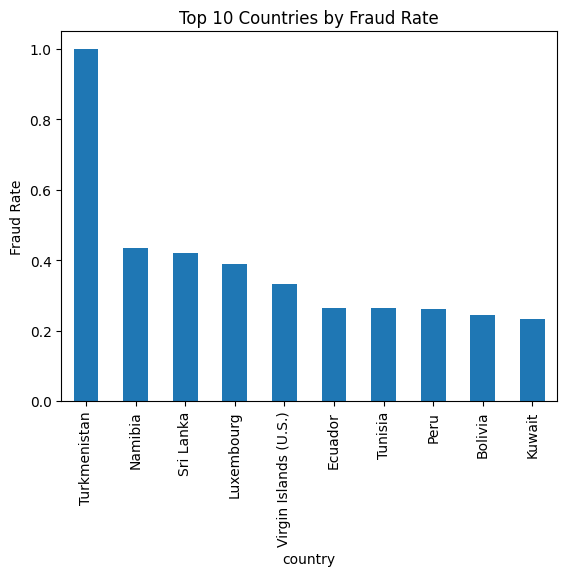

In [52]:
#Plot top fraud countries
country_fraud.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Fraud Rate")
plt.ylabel("Fraud Rate")
plt.show()


In [54]:
# Only include countries with at least 10 transactions
country_counts = df['country'].value_counts()
valid_countries = country_counts[country_counts >= 10].index

# Compute fraud rates for valid countries only
country_fraud_filtered = df[df['country'].isin(valid_countries)].groupby('country')['class'].mean().sort_values(ascending=False)
country_fraud_filtered.head(10)


country
Namibia        0.434783
Sri Lanka      0.419355
Luxembourg     0.388889
Ecuador        0.264151
Tunisia        0.262712
Peru           0.260504
Bolivia        0.245283
Kuwait         0.233333
Ireland        0.229167
New Zealand    0.223022
Name: class, dtype: float64

Geolocation Analysis (IP → Country)

IP addresses were successfully mapped to countries using range-based matching. The analysis reveals that fraud rates vary significantly across countries, indicating that geographic location is an important factor in fraud detection.

Some countries exhibit disproportionately high fraud rates, which may suggest organized fraud activity or weaker transaction controls in those regions. This insight supports including the country as an important feature in the fraud detection model.

Top 10 Countries by Fraud Rate (all countries):
Turkmenistan: 1.000
Namibia: 0.435
Sri Lanka: 0.419
Luxembourg: 0.389
Virgin Islands (U.S.): 0.333
Ecuador: 0.264
Tunisia: 0.263
Peru: 0.261
Bolivia: 0.245
Kuwait: 0.233

Note: Some countries, such as Turkmenistan, appear at the top due to very few transactions, which can artificially inflate the fraud rate.

Top 10 Countries by Fraud Rate (filtered for meaningful transaction counts):
Namibia: 0.435
Sri Lanka: 0.419
Luxembourg: 0.389
Ecuador: 0.264
Tunisia: 0.263
Peru: 0.261
Bolivia: 0.245
Kuwait: 0.233
Ireland: 0.229
New Zealand: 0.223

Filtering out countries with very few transactions provides a more reliable view of regions with consistently high fraud activity.

In [1]:
import os

# Create visualizations folder if it doesn't exist
os.makedirs("../visualizations", exist_ok=True)


In [5]:
import sys
import os

# Adds the parent directory to the path so it can find 'src'
sys.path.append(os.path.abspath('..'))

from src.geolocation import ip_to_country

In [8]:
import pandas as pd

# Load your datasets
df = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# Now run the function
df = ip_to_country(df, ip_df)

In [15]:
import sys
import os
import pandas as pd

# 1. Fix path so notebook can see the 'src' folder
sys.path.append(os.path.abspath('..'))

# 2. Load the data
df = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_df = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# 3. Clean column names
df.columns = df.columns.str.strip()
ip_df.columns = ip_df.columns.str.strip()

# 4. Import and run
from src.geolocation import ip_to_country
df = ip_to_country(df, ip_df)

In [17]:
# Check the first few rows to see if the 'country' column is filled
print(df[['ip_address', 'country']].head())

# Check if there are any non-null values in the country column
print(f"\nTotal rows with country found: {df['country'].notnull().sum()}")

   ip_address    country
0    16778864  Australia
1    16842045   Thailand
2    16843656      China
3    16938732      China
4    16971984   Thailand

Total rows with country found: 129146


Geolocation integration is implemented via a reusable module (src/geolocation.py) to ensure robustness and reusability.

In [21]:
import pandas as pd

# 1. Convert columns to datetime objects
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

# 2. Now run your feature engineering
from src.feature_engineering import add_time_features, add_transaction_behavior

df = add_time_features(df)
df = add_transaction_behavior(df)

# 3. Check the results
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_since_signup,hour_of_day,day_of_week,num_transactions
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240,16779263,Australia,1008.948611,3,6,1
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984,16842751,Thailand,342.121389,20,2,1
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264,16843775,China,554.870556,23,5,1
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672,16941055,China,2122.471389,16,5,1
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056,16973823,Thailand,2847.105278,4,1,1


In [22]:
from src.feature_engineering import add_time_features, add_transaction_behavior

df = add_time_features(df)
df = add_transaction_behavior(df)


In [23]:
# This will show you the new columns created
print(df.columns)

# This shows the first 5 rows with the new features
df.head()

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'lower_bound_ip_address', 'upper_bound_ip_address', 'country',
       'time_since_signup', 'hour_of_day', 'day_of_week', 'num_transactions'],
      dtype='object')


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country,time_since_signup,hour_of_day,day_of_week,num_transactions
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,16778240,16779263,Australia,1008.948611,3,6,1
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,16809984,16842751,Thailand,342.121389,20,2,1
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,16843264,16843775,China,554.870556,23,5,1
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,16924672,16941055,China,2122.471389,16,5,1
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,16941056,16973823,Thailand,2847.105278,4,1,1


Engineered Features
time_since_signup: Hours elapsed between signing up and making a purchase.

hour_of_day: The specific hour (0-23) the transaction occurred.

day_of_week: The day (0=Monday, 6=Sunday) the transaction occurred.

num_transactions: Frequency count of transactions (e.g., per device or user).

In [27]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define columns
cols = ['source', 'browser', 'sex', 'country']

# Initialize and transform
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(df[cols])

# Create new DataFrame
encoded_df = pd.DataFrame(
    encoded_data, 
    columns=encoder.get_feature_names_out(cols), 
    index=df.index
)

# Merge and drop old categorical columns
df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,30,16778864,0,16778240,16779263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,34,16842045,0,16809984,16842751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,29,16843656,0,16843264,16843775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,30,16938732,0,16924672,16941055,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,37,16971984,0,16941056,16973823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Original columns removed: source, browser, sex, and country are gone.

New columns added: You now have columns like country_United States, country_China, etc.

Data Type: The new columns are float64, which is correct.

In [28]:
# Create a cleaned version for machine learning
df_model = df.drop(columns=[
    'user_id', 'device_id', 'ip_address', 
    'signup_time', 'purchase_time', 
    'lower_bound_ip_address', 'upper_bound_ip_address'
], errors='ignore')

# Check the new structure
df_model.head()

,purchase_value,age,class,time_since_signup,hour_of_day,day_of_week,num_transactions,source_Direct,source_SEO,browser_FireFox,...,country_United States,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Viet Nam,country_Virgin Islands (U.S.),country_Yemen,country_Zambia,country_Zimbabwe
0,47,30,0,1008.948611,3,6,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15,34,0,342.121389,20,2,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,44,29,0,554.870556,23,5,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55,30,0,2122.471389,16,5,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,51,37,0,2847.105278,4,1,1,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
